In [6]:
#Import necessary libraries for future use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [7]:
#Load in both data sets and merge into one
data_high = pd.read_csv('high_popularity_spotify_data.csv')
data_low = pd.read_csv('low_popularity_spotify_data.csv')
data_all = pd.concat([data_low, data_high], ignore_index=True)

print(f'\nSize of data set: {data_all.shape}\n')
data_all.head()


Size of data set: (4831, 29)



,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


In [8]:
#Remove any duplicate rows
data_all.drop_duplicates(inplace=True)
print(f"\nSize after removing duplicates:\n\n{data_all.shape}")


Size after removing duplicates:

(4788, 29)


In [9]:
#Print missing values in each column and percent of these to columns' total entry counts
print(f'\nMissing values in each column:\n\n{data_all.isnull().sum()} \n')
nan_percent = data_all.isnull().mean()*100
print(f'\nPercent of values in each column that are missing:\n\n{nan_percent}')


Missing values in each column:

time_signature              1
track_popularity            0
speechiness                 1
danceability                1
playlist_name               0
track_artist                0
duration_ms                 1
energy                      1
playlist_genre              0
playlist_subgenre           0
track_href                  1
track_name                  0
mode                        1
uri                         1
type                        1
track_album_release_date    0
analysis_url                1
id                          1
instrumentalness            1
track_album_id              0
playlist_id                 0
track_id                    0
valence                     1
key                         1
tempo                       1
loudness                    1
acousticness                1
liveness                    1
track_album_name            1
dtype: int64 


Percent of values in each column that are missing:

time_signature              0

In [10]:
#Remove any null values
data_full = data_all.dropna(axis=0)
print(f'Size of data set after removing NaNs: {data_full.shape}')

Size of data set after removing NaNs: (4786, 29)


In [11]:
#Remove columns with irrelevant data
data_fewer_col = data_full.copy()
data_fewer_col.drop(columns=["track_href","uri","track_album_id","playlist_id","track_id","analysis_url","id"], inplace=True)
print("\n")
data_fewer_col.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,type,track_album_release_date,instrumentalness,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,audio_features,2005-12-14,0.290000,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,audio_features,2015-03-27,0.000377,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,audio_features,2016-11-04,0.000006,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,audio_features,2007-05-03,0.000000,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,audio_features,2000-01-01,0.284000,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


In [12]:
#Change key column to display the key of the song instead of a number
data_fewer_col["key"] = data_fewer_col["key"].map({0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 
    5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'})

In [13]:
#Print columns types and unique values per column
print("\nColumn data types after removing irrelevant columns and changing \"key\" column: \n")
print(data_fewer_col.dtypes)
print("\n\nCount of unique values in each column:\n")
print(data_fewer_col.nunique())


Column data types after removing irrelevant columns and changing "key" column: 

time_signature              float64
track_popularity              int64
speechiness                 float64
danceability                float64
playlist_name                object
track_artist                 object
duration_ms                 float64
energy                      float64
playlist_genre               object
playlist_subgenre            object
track_name                   object
mode                        float64
type                         object
track_album_release_date     object
instrumentalness            float64
valence                     float64
key                          object
tempo                       float64
loudness                    float64
acousticness                float64
liveness                    float64
track_album_name             object
dtype: object


Count of unique values in each column:

time_signature                 4
track_popularity              86
spee

In [14]:
#Display cleaned numerical data
data_overall = data_fewer_col.copy()
print(f'\nSummary of statistics:\n')
data_overall.describe()


Summary of statistics:



,time_signature,track_popularity,speechiness,danceability,duration_ms,energy,mode,instrumentalness,valence,tempo,loudness,acousticness,liveness
count,4786.000000,4786.000000,4786.000000,4786.000000,4.786000e+03,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000
mean,3.936064,54.639365,0.101263,0.621812,2.062069e+05,0.585782,0.563101,0.202445,0.481331,118.249055,-9.300994,0.342129,0.167747
std,0.410529,19.879783,0.100750,0.187964,8.196751e+04,0.246685,0.496054,0.352787,0.258264,28.493450,7.143068,0.325915,0.124661
min,1.000000,11.000000,0.021900,0.058900,3.537500e+04,0.000202,0.000000,0.000000,0.029600,48.232000,-48.069000,0.000004,0.021000
25%,4.000000,41.000000,0.038500,0.524000,1.589902e+05,0.440250,0.000000,0.000000,0.273000,96.072000,-10.329000,0.052725,0.095400
50%,4.000000,55.000000,0.055900,0.653000,1.949145e+05,0.632000,1.000000,0.000096,0.482000,118.030000,-7.215000,0.225000,0.118000
75%,4.000000,72.000000,0.117000,0.757000,2.335400e+05,0.776000,1.000000,0.207750,0.690000,136.723500,-5.339750,0.593000,0.195000
max,5.000000,100.000000,0.927000,0.979000,1.355260e+06,0.998000,1.000000,0.991000,0.987000,241.426000,1.318000,0.996000,0.979000


In [15]:
#Display cleaned string data
print(f'\nSummary of statistics:\n')
data_overall.describe(include='object')


Summary of statistics:



,playlist_name,track_artist,playlist_genre,playlist_subgenre,track_name,type,track_album_release_date,key,track_album_name
count,4786,4786,4786,4786,4786,4786,4786,4786,4786
unique,116,3388,35,84,4371,1,1845,12,3815
top,Meditative Vibes,Bad Bunny,electronic,modern,Too Sweet,audio_features,2024-11-15,C#,"Sincerely, Benson"
freq,230,29,578,692,5,4786,35,582,21


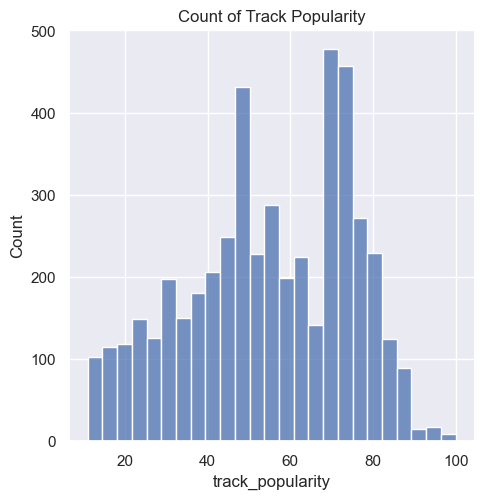

In [16]:
#Check the distribution of the target: track_popularity
sns.displot(data_overall['track_popularity'])
plt.title("Count of Track Popularity")
plt.show()

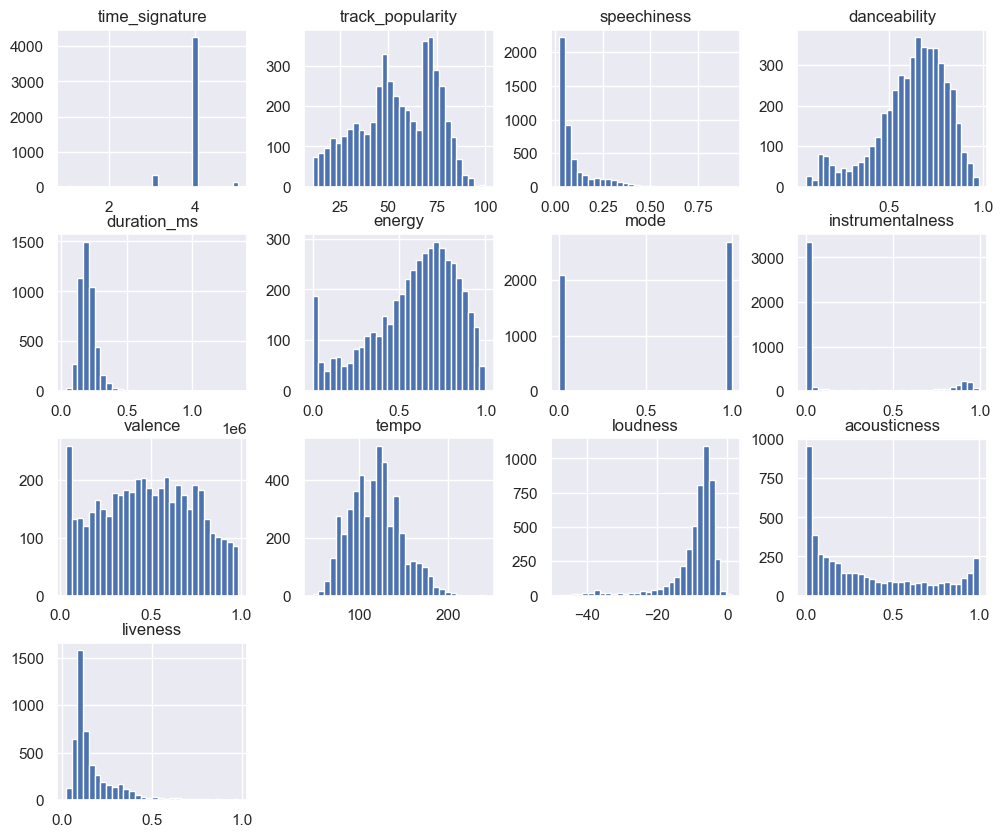

In [17]:
#Check other values with questionable distributions from the description table
numeric_columns = data_overall.select_dtypes(include=['number']).columns
data_overall[numeric_columns].hist(bins=30, figsize=(12,10))
plt.show()

In [18]:
#Remove columns with irrelevant data
data_shortened = data_overall.copy()
data_shortened = data_shortened.drop(columns=['time_signature'])
data_shortened.head()

,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,track_name,...,type,track_album_release_date,instrumentalness,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,Fortunate Son,...,audio_features,2005-12-14,0.290000,0.432,C,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,Jump - 2015 Remaster,...,audio_features,2015-03-27,0.000377,0.795,C,129.981,-6.219,0.1710,0.0702,The Collection
2,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,Edge of Seventeen - 2016 Remaster,...,audio_features,2016-11-04,0.000006,0.658,C,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,Dream A Little Dream Of Me - Single Version,...,audio_features,2007-05-03,0.000000,0.394,C,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,Coffee Cold,...,audio_features,2000-01-01,0.284000,0.475,A,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


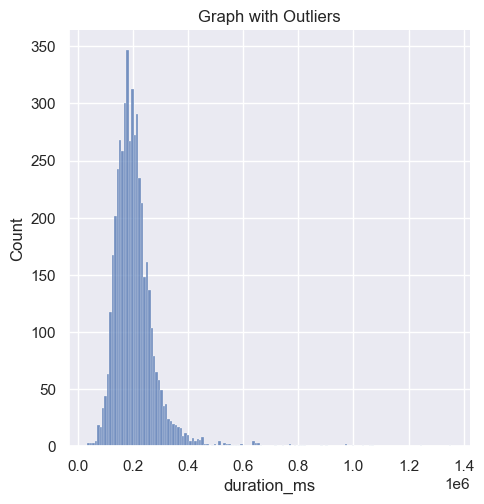

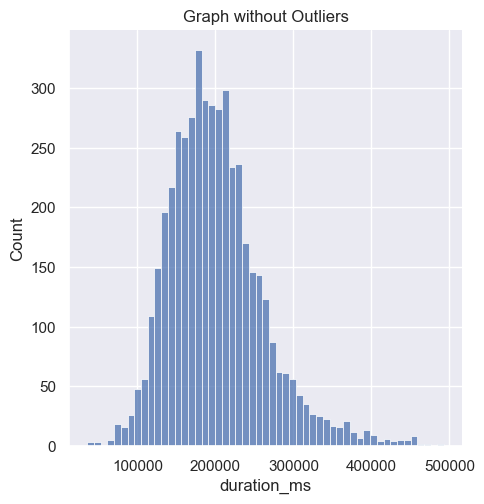

In [19]:
#remove outliers from duration_ms data due to extreme outliers on the upper end of the data
upper_limit = data_shortened['duration_ms'].quantile(0.99)

data_ms_fix = data_shortened.copy()

data_ms_fix = data_shortened[data_shortened['duration_ms'] <= upper_limit]

sns.displot(data_shortened['duration_ms'])
plt.title("Graph with Outliers")
plt.show()

sns.displot(data_ms_fix['duration_ms'])
plt.title("Graph without Outliers")
plt.show()

/var/folders/f5/lcv50l3s2w94x1c6n8kvkh3c0000gn/T/ipykernel_13989/2526585157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ms_fix.loc[:, 'speechiness_log'] = np.log10(data_ms_fix['speechiness'])
/var/folders/f5/lcv50l3s2w94x1c6n8kvkh3c0000gn/T/ipykernel_13989/2526585157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ms_fix.loc[:, 'liveness_log'] = np.log10(data_ms_fix['liveness'])


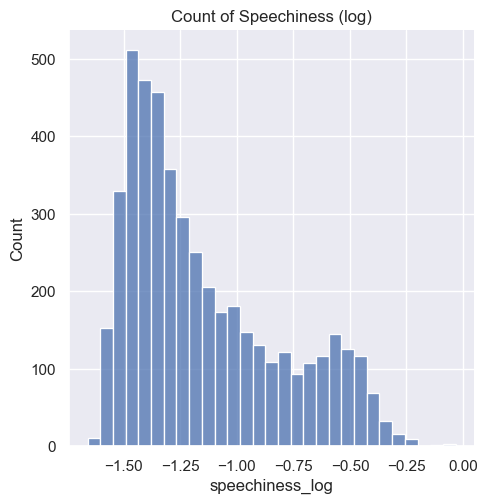

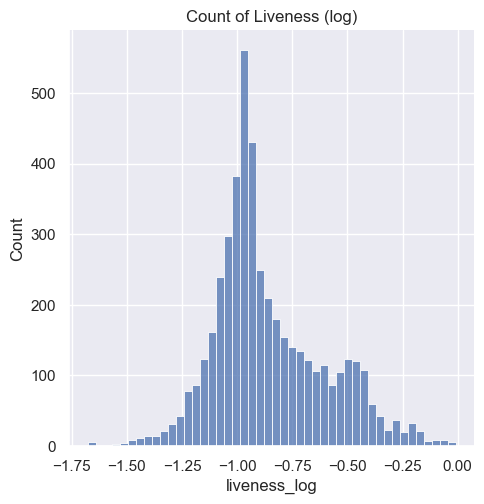

In [20]:
#scale speechiness and liveness to help distribution
data_ms_fix_copy = data_ms_fix.copy()

data_ms_fix.loc[:, 'speechiness_log'] = np.log10(data_ms_fix['speechiness'])
data_ms_fix.loc[:, 'liveness_log'] = np.log10(data_ms_fix['liveness'])

data = data_ms_fix.copy()

data = data.drop(columns=['speechiness','liveness'])

sns.displot(data['speechiness_log'])
plt.title("Count of Speechiness (log)")
plt.show()

sns.displot(data['liveness_log'])
plt.title("Count of Liveness (log)")
plt.show()

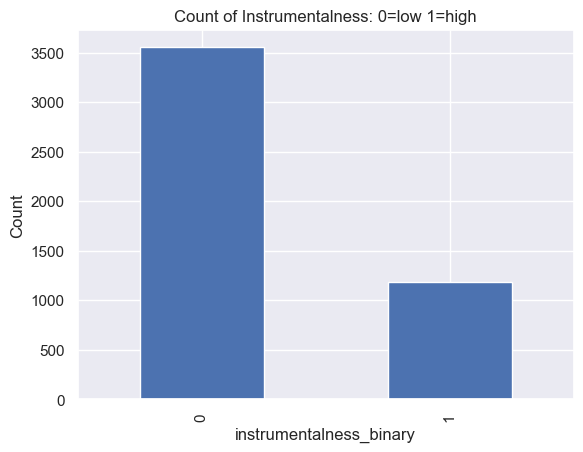

In [21]:
#Turn instrumentalness into a binary variable due to extreme high and low values
data_final = data.copy()

data_final['instrumentalness_binary'] = data_final['instrumentalness'].apply(lambda x: 1 if x > 0.2 else 0)
data_final = data_final.drop(columns=['instrumentalness'])

data_final['instrumentalness_binary'].value_counts().plot(kind='bar')
plt.title('Count of Instrumentalness: 0=low 1=high')
plt.xlabel('instrumentalness_binary')
plt.ylabel('Count')
plt.show()

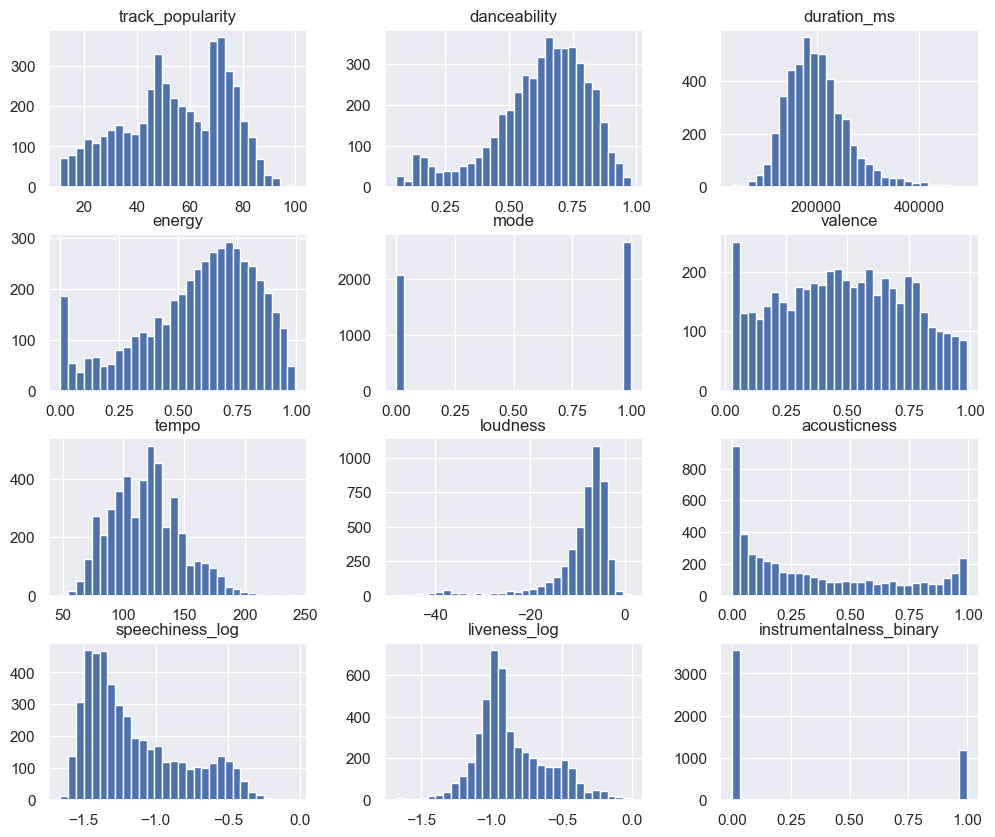

In [22]:
#Display edited data
numeric_columns = data_final.select_dtypes(include=['number']).columns
data_final[numeric_columns].hist(bins=30, figsize=(12,10))
plt.show()

In [23]:
#Identify and seperate numeric columns to form a correlation matrix
numeric_cols = data_final.select_dtypes(include=['number']).columns
corr_matrix = data_final[numeric_cols].corr()

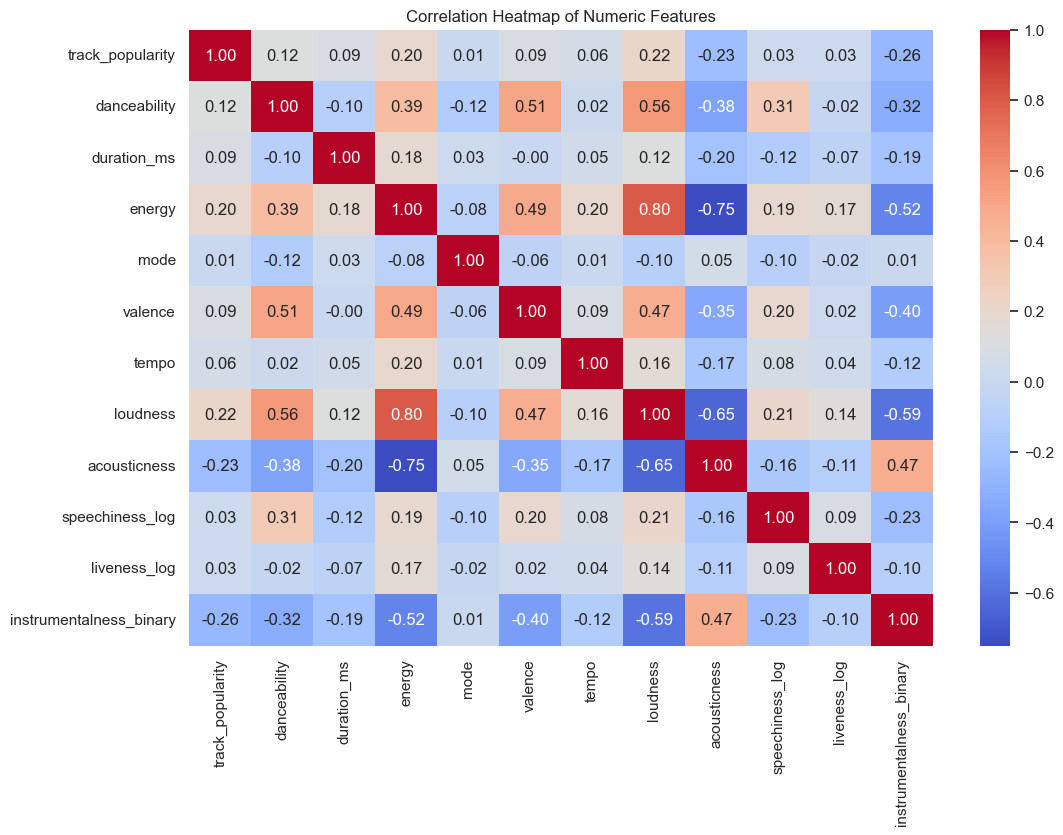

In [24]:
#Display the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [25]:
#Calculate variance inflation factor for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_final[['energy','loudness','acousticness']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [26]:
#Display VIF. None are high enought to be of serious concern.
vif

,VIF,features
0,1.418345,energy
1,3.898807,loudness
2,3.519142,acousticness


<Axes: title={'center': 'Count of Songs by Popularity'}, ylabel='Frequency'>

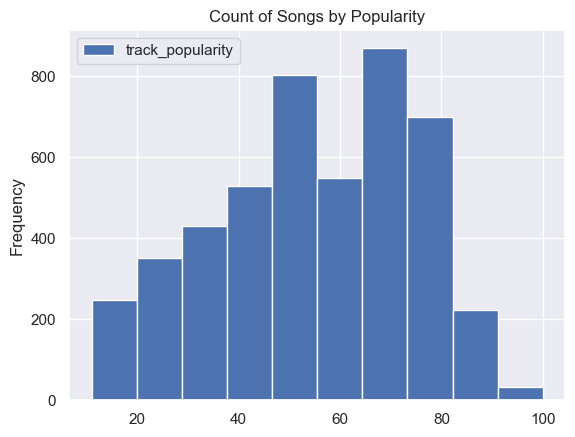

In [27]:
#Display distribution of track_popularity
data_final.plot.hist(y="track_popularity",title="Count of Songs by Popularity")

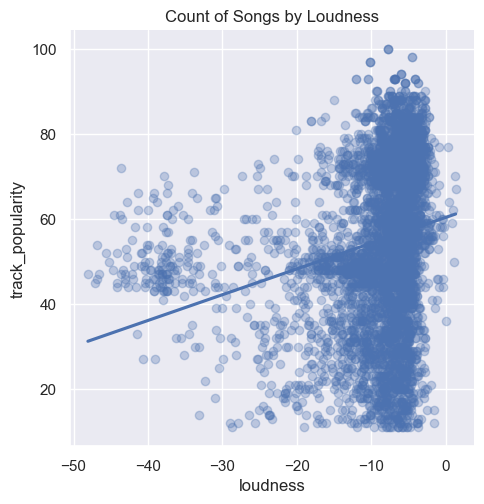

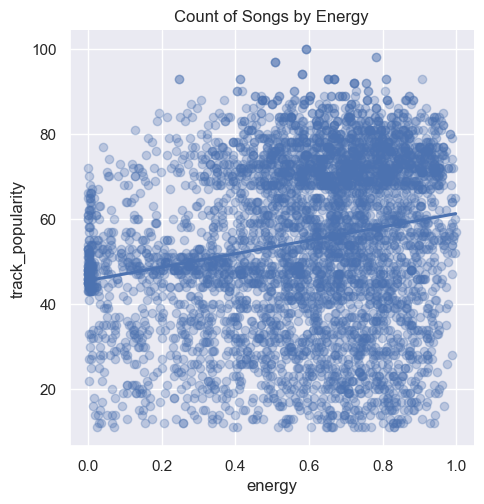

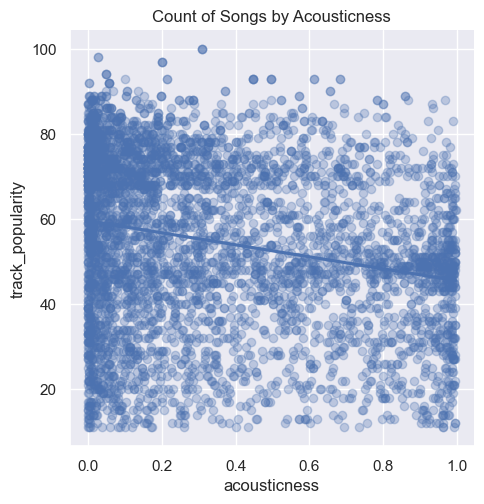

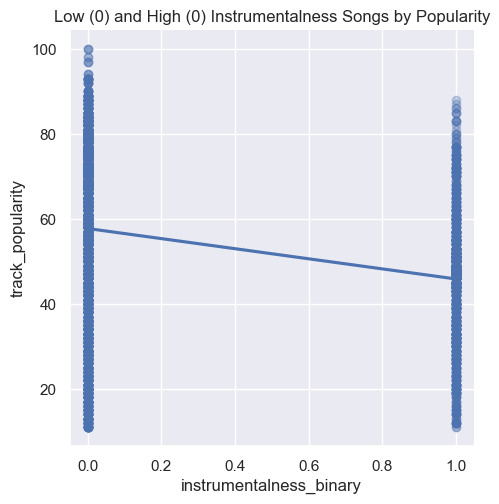

In [28]:
#Visualize relationship between popularity and highly correlated features

#Popularity and loudness
sns.lmplot(x="loudness", y="track_popularity", data=data_final, fit_reg=True, ci=None, scatter_kws={'alpha':0.3})
plt.title("Count of Songs by Loudness")
plt.show()

#Popularity and energy
sns.lmplot(x="energy",y="track_popularity", data=data_final, fit_reg=True, ci=None, scatter_kws={'alpha':0.3})
plt.title("Count of Songs by Energy")
plt.show()

#Popularity and acousticness
sns.lmplot(x="acousticness",y="track_popularity", data=data_final, fit_reg=True, ci=None, scatter_kws={'alpha':0.3})
plt.title("Count of Songs by Acousticness")
plt.show()

#Popularity and instrumentalness
sns.lmplot(x="instrumentalness_binary",y="track_popularity", data=data_final, fit_reg=True, ci=None, scatter_kws={'alpha':0.3})
plt.title("Low (0) and High (0) Instrumentalness Songs by Popularity")
plt.show()

In [29]:
#Split data into test and train sets; cateogorize into taget, binary, and numerical columns; use OneHotEncoder to create dummy variables
#for the categorical column "playlist_genre"; fit and transform the x data; check that sizes of train and tests sets are equal.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

target_col = "track_popularity"
binary_col = ["instrumentalness_binary"]
num_cols = [c for c in data_final.select_dtypes(include="number").columns 
            if c not in binary_col + [target_col]]
cat_col = ["playlist_genre"]

inputs = data_final[num_cols + binary_col + cat_col]
target = data_final[target_col]   

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([("num", StandardScaler(), num_cols), ("bin", "passthrough", binary_col), ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_col)])

x_train_scaled = preprocessor.fit_transform(x_train)  

x_test_scaled = preprocessor.transform(x_test)  

column_names = preprocessor.get_feature_names_out()
x_train_scaled = pd.DataFrame(x_train_scaled, columns=column_names, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=column_names, index=x_test.index)

print(f"\nSize of x_train_scaled:\n\n{x_train_scaled.shape}")
print(f"\nSize of x_test_scaled:\n\n{x_test_scaled.shape}")
print(f"\nSize of y_train:\n\n{y_train.shape}")
print(f"\nSize of y_test:\n\n{y_test.shape}")


Size of x_train_scaled:

(3790, 45)

Size of x_test_scaled:

(948, 45)

Size of y_train:

(3790,)

Size of y_test:

(948,)


In [30]:
#Rename the dummy columns and print all dummy names
x_train_scaled.columns = [col.split("__")[1] if "__" in col else col for col in x_train_scaled.columns]
x_test_scaled.columns = [col.split("__")[1] if "__" in col else col for col in x_test_scaled.columns]
print(x_train_scaled.columns)

Index(['danceability', 'duration_ms', 'energy', 'mode', 'valence', 'tempo',
       'loudness', 'acousticness', 'speechiness_log', 'liveness_log',
       'instrumentalness_binary', 'playlist_genre_ambient',
       'playlist_genre_arabic', 'playlist_genre_blues',
       'playlist_genre_brazilian', 'playlist_genre_cantopop',
       'playlist_genre_classical', 'playlist_genre_country',
       'playlist_genre_disco', 'playlist_genre_electronic',
       'playlist_genre_folk', 'playlist_genre_funk', 'playlist_genre_gaming',
       'playlist_genre_gospel', 'playlist_genre_hip-hop',
       'playlist_genre_indian', 'playlist_genre_indie', 'playlist_genre_j-pop',
       'playlist_genre_jazz', 'playlist_genre_k-pop', 'playlist_genre_korean',
       'playlist_genre_latin', 'playlist_genre_lofi',
       'playlist_genre_mandopop', 'playlist_genre_metal', 'playlist_genre_pop',
       'playlist_genre_punk', 'playlist_genre_r&b', 'playlist_genre_reggae',
       'playlist_genre_rock', 'playlist_genre_soc

In [31]:
#Create a linear regression with top 3 correlation variables
from sklearn.linear_model import LinearRegression

predictors = ["instrumentalness_binary","loudness","acousticness"]

lr = LinearRegression()
lr.fit(x_train_scaled[predictors], y_train)

predictions = lr.predict(x_test_scaled[predictors])

In [32]:
#Calculate accuracy of the model
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {error:.3f}")

Mean Absolute Error: 15.448


In [33]:
#Find relevant statistics for the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

n = x_test_scaled.shape[0]
p = x_test_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"\nRMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")
print(f"Adjusted R^2: {adj_r2:.3f}")


RMSE: 18.714
R^2: 0.098
Adjusted R^2: 0.053


In [34]:
#Add another variable to the model
from sklearn.linear_model import LinearRegression

predictors1 = ["instrumentalness_binary","loudness","acousticness","energy"]

lr = LinearRegression()
lr.fit(x_train_scaled[predictors1], y_train)

predictions1 = lr.predict(x_test_scaled[predictors1])

In [35]:
#Check accuracy of the model
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions1)

print(f"Mean Absolute Error: {error:.3f}")

Mean Absolute Error: 15.461


In [36]:
#Find relevant statistics for the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
r2 = r2_score(y_test, predictions1)

n = x_test_scaled.shape[0]
p = x_test_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"\nRMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")
print(f"Adjusted R^2: {adj_r2:.3f}")


RMSE: 18.722
R^2: 0.097
Adjusted R^2: 0.052


In [37]:
#Remove energy for reduced adjusted R^2 value
from sklearn.linear_model import LinearRegression

predictors2 = ["instrumentalness_binary","loudness","acousticness","danceability"]

lr = LinearRegression()
lr.fit(x_train_scaled[predictors2], y_train)

predictions2 = lr.predict(x_test_scaled[predictors2])

In [38]:
#Check accuracy of the model
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions2)

print(f"Mean Absolute Error: {error:.3f}")

Mean Absolute Error: 15.446


In [39]:
#Find relevant statistics for the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, predictions2))
r2 = r2_score(y_test, predictions2)

n = x_test_scaled.shape[0]
p = x_test_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"\nRMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")
print(f"Adjusted R^2: {adj_r2:.3f}")


RMSE: 18.717
R^2: 0.098
Adjusted R^2: 0.053


In [40]:
#Add a new variable to the model
from sklearn.linear_model import LinearRegression

predictors3 = ["instrumentalness_binary","loudness","acousticness","danceability","duration_ms"]

lr = LinearRegression()
lr.fit(x_train_scaled[predictors3], y_train)

predictions3 = lr.predict(x_test_scaled[predictors3])

In [41]:
#Check accuracy of the model
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions3)

print(f"Mean Absolute Error: {error:.3f}")

Mean Absolute Error: 15.432


In [42]:
#Find relevant statistics for the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, predictions3))
r2 = r2_score(y_test, predictions3)

n = x_test_scaled.shape[0]
p = x_test_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"\nRMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")
print(f"Adjusted R^2: {adj_r2:.3f}")


RMSE: 18.715
R^2: 0.098
Adjusted R^2: 0.053


In [43]:
#Add a new variable to the model
from sklearn.linear_model import LinearRegression

predictors4 = ["instrumentalness_binary","loudness","acousticness","danceability","duration_ms","valence"]

lr = LinearRegression()
lr.fit(x_train_scaled[predictors4], y_train)

predictions4 = lr.predict(x_test_scaled[predictors4])

In [44]:
#Check accuracy of the model
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions4)

print(f"Mean Absolute Error: {error:.3f}")

Mean Absolute Error: 15.374


In [45]:
#Find relevant statistics for the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, predictions4))
r2 = r2_score(y_test, predictions4)

n = x_test_scaled.shape[0]
p = x_test_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"\nRMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")
print(f"Adjusted R^2: {adj_r2:.3f}")


RMSE: 18.674
R^2: 0.102
Adjusted R^2: 0.057


In [46]:
#Add a new variable to the model
from sklearn.linear_model import LinearRegression

predictors5 = ["instrumentalness_binary","loudness","acousticness","danceability","duration_ms","valence","tempo"]

lr = LinearRegression()
lr.fit(x_train_scaled[predictors5], y_train)

predictions5 = lr.predict(x_test_scaled[predictors5])

In [47]:
#Check accuracy of the model
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions5)

print(f"Mean Absolute Error: {error:.3f}")

Mean Absolute Error: 15.364


In [48]:
#Find relevant statistics for the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, predictions5))
r2 = r2_score(y_test, predictions5)

n = x_test_scaled.shape[0]
p = x_test_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"\nRMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")
print(f"Adjusted R^2: {adj_r2:.3f}")


RMSE: 18.672
R^2: 0.102
Adjusted R^2: 0.057


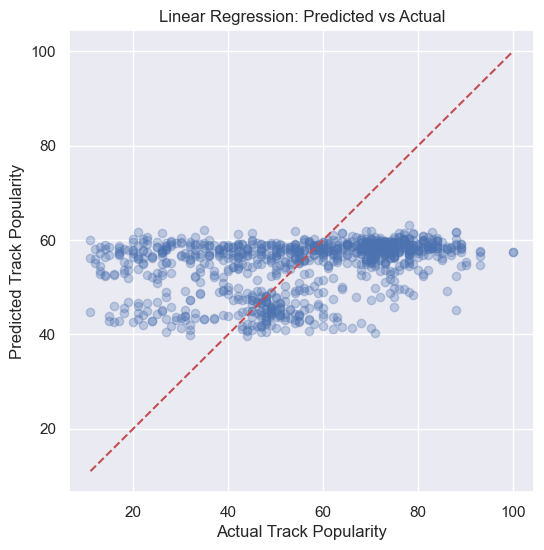

In [49]:
#The final model had the lowest overall accuracy, and incorporates all relvant variables in it with the highest correlation (>0.03)
#that positively contributed to the model (meaning no "energy"). This graph visualized the most accurate linear regression, showing
#predicted popularity versus actual. However, the predicted popularity only rnages from roughly 40 to 60, showing centrality in
#the predictions, and the predictions (and perhaps model) do not seem to fit the data well.
predictions_best = predictions5

plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

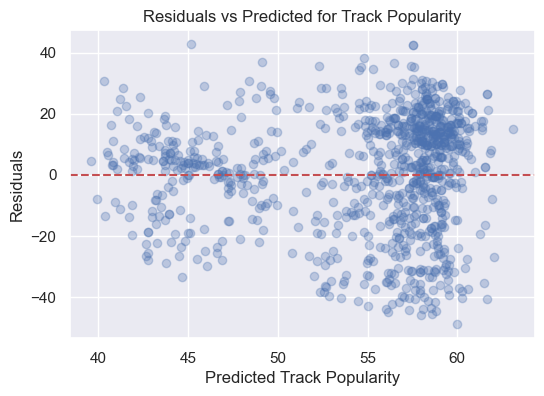

In [50]:
#Plor the residuals for predictions, showing a roughly random relationship with no overall trends.
residuals = y_test - predictions_best
plt.figure(figsize=(6,4))
plt.scatter(predictions_best, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Track Popularity")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted for Track Popularity")
plt.show()

In [51]:
#Add a predicted and actual column to show popularity metrics from model and dataset
results = x_test_scaled.copy()
results["Actual"] = y_test
results["Predicted"] = predictions_best.round()
results.head()

,danceability,duration_ms,energy,mode,valence,tempo,loudness,acousticness,speechiness_log,liveness_log,...,playlist_genre_r&b,playlist_genre_reggae,playlist_genre_rock,playlist_genre_soca,playlist_genre_soul,playlist_genre_turkish,playlist_genre_wellness,playlist_genre_world,Actual,Predicted
2343,-0.654943,-0.235130,1.463029,0.874788,-0.308650,1.116757,1.026268,-0.938268,-0.831237,2.596529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,59.0
366,-0.382467,-0.895096,-1.195235,-1.143134,0.629994,-1.372189,-0.753462,0.931825,-0.548595,0.210896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,44.0
1411,1.599664,-1.162017,0.798463,0.874788,0.332564,0.417753,1.226085,-0.599425,1.936297,0.243159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,59.0
1728,0.456333,-0.375069,0.060510,0.874788,0.251446,0.720007,0.200255,1.248529,0.519845,1.177263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,54.0
4001,-0.136704,0.436015,-0.551054,0.874788,0.205094,2.125324,0.370527,-0.368815,-0.685206,1.727769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78,58.0


In [52]:
#Create random forest regression with top 3 features
from sklearn.ensemble import RandomForestRegressor

predictors = ["instrumentalness_binary","acousticness","loudness"]
x_train_randf = x_train_scaled[predictors]
x_test_randf = x_test_scaled[predictors]

randf = RandomForestRegressor(n_estimators=200, random_state=42)
randf.fit(x_train_randf, y_train)

predictions_randf = randf.predict(x_test_randf)

In [53]:
#Calculate the relevant statistics
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions_randf)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_randf))
r2_rf = r2_score(y_test, predictions_randf)
n = x_test_randf.shape[0]
p = x_test_randf.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")

Mean Absolute Error: 14.347
Random Forest RMSE: 18.129
Random Forest R^2: 0.153
Random Forest Adjusted R^2: 0.151


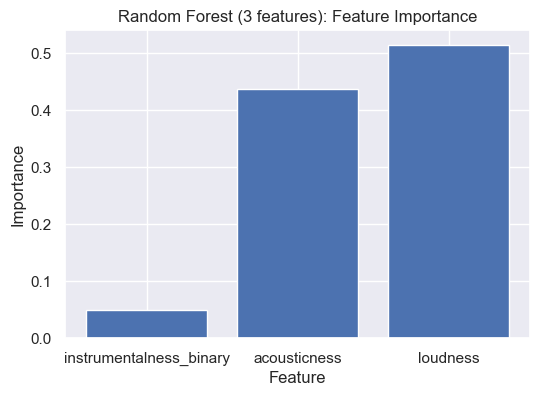

In [54]:
#Find feature importance in the model
importances = randf.feature_importances_ 
features = x_train_randf.columns

plt.figure(figsize=(6,4))
plt.bar(features, importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest (3 features): Feature Importance")
plt.show()

In [55]:
#Use numeric and binary (instrumentalness) columns to form a random forest regression
from sklearn.ensemble import RandomForestRegressor

predictors1 = [c for c in x_train_scaled.columns if c in num_cols + binary_col]
x_train_randf1 = x_train_scaled[predictors1]
x_test_randf1 = x_test_scaled[predictors1]

randf = RandomForestRegressor(n_estimators=200, random_state=42)
randf.fit(x_train_randf1, y_train)

predictions_randf1 = randf.predict(x_test_randf1)

In [56]:
#Calculate the relevant statistics
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions_randf1)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_randf1))
r2_rf = r2_score(y_test, predictions_randf1)
n = x_test_randf1.shape[0]
p = x_test_randf1.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")

Mean Absolute Error: 13.393
Random Forest RMSE: 16.948
Random Forest R^2: 0.260
Random Forest Adjusted R^2: 0.251


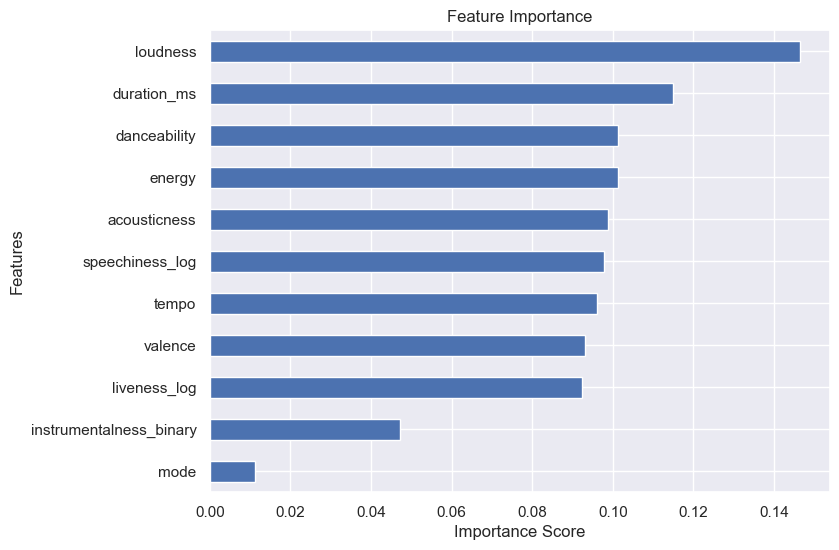

In [57]:
#Find feature importance in the model
importances = randf.feature_importances_

feat_imp = pd.Series(importances, predictors1).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [58]:
#Create random forest regression using only top 5 features in terms of importance
from sklearn.ensemble import RandomForestRegressor

predictors2 = ["loudness","duration_ms","danceability","energy","acousticness"]
x_train_randf2 = x_train_scaled[predictors2]
x_test_randf2 = x_test_scaled[predictors2]

randf = RandomForestRegressor(n_estimators=200, random_state=42)
randf.fit(x_train_randf2, y_train)

predictions_randf2 = randf.predict(x_test_randf2)

In [59]:
#Caclulate the relvant statistics
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions_randf2)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_randf2))
r2_rf = r2_score(y_test, predictions_randf2)
n = x_test_randf2.shape[0]
p = x_test_randf2.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")

Mean Absolute Error: 13.857
Random Forest RMSE: 17.372
Random Forest R^2: 0.223
Random Forest Adjusted R^2: 0.218


In [60]:
#Test only including the top 4 variables by importance
from sklearn.ensemble import RandomForestRegressor

predictors3 = ["loudness","duration_ms","danceability","energy"]
x_train_randf3 = x_train_scaled[predictors3]
x_test_randf3 = x_test_scaled[predictors3]

randf = RandomForestRegressor(n_estimators=200, random_state=42)
randf.fit(x_train_randf3, y_train)

predictions_randf3 = randf.predict(x_test_randf3)

In [61]:
#Calculate the relevant statistics
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions_randf3)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_randf3))
r2_rf = r2_score(y_test, predictions_randf3)
n = x_test_randf3.shape[0]
p = x_test_randf3.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")

Mean Absolute Error: 13.734
Random Forest RMSE: 17.233
Random Forest R^2: 0.235
Random Forest Adjusted R^2: 0.232


In [62]:
#Test only including the top 3 variables by importance
from sklearn.ensemble import RandomForestRegressor

predictors4 = ["loudness","duration_ms","danceability"]
x_train_randf4 = x_train_scaled[predictors4]
x_test_randf4 = x_test_scaled[predictors4]

randf = RandomForestRegressor(n_estimators=200, random_state=42)
randf.fit(x_train_randf4, y_train)

predictions_randf4 = randf.predict(x_test_randf4)

In [63]:
#Calculate the relevant statistics
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions_randf4)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_randf4))
r2_rf = r2_score(y_test, predictions_randf4)
n = x_test_randf4.shape[0]
p = x_test_randf4.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")

Mean Absolute Error: 14.038
Random Forest RMSE: 17.695
Random Forest R^2: 0.193
Random Forest Adjusted R^2: 0.191


In [64]:
#Test the random forest regression including all variables
from sklearn.ensemble import RandomForestRegressor

predictors5 = x_train_scaled.columns
x_train_randf5 = x_train_scaled[predictors5]
x_test_randf5 = x_test_scaled[predictors5]

randf = RandomForestRegressor(n_estimators=200, random_state=42)
randf.fit(x_train_randf5, y_train)

predictions_randf5 = randf.predict(x_test_randf5)

In [65]:
#Calculate the relevant statistics
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions_randf5)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_randf5))
r2_rf = r2_score(y_test, predictions_randf5)
n = x_test_randf5.shape[0]
p = x_test_randf5.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")

Mean Absolute Error: 11.086
Random Forest RMSE: 14.753
Random Forest R^2: 0.439
Random Forest Adjusted R^2: 0.411


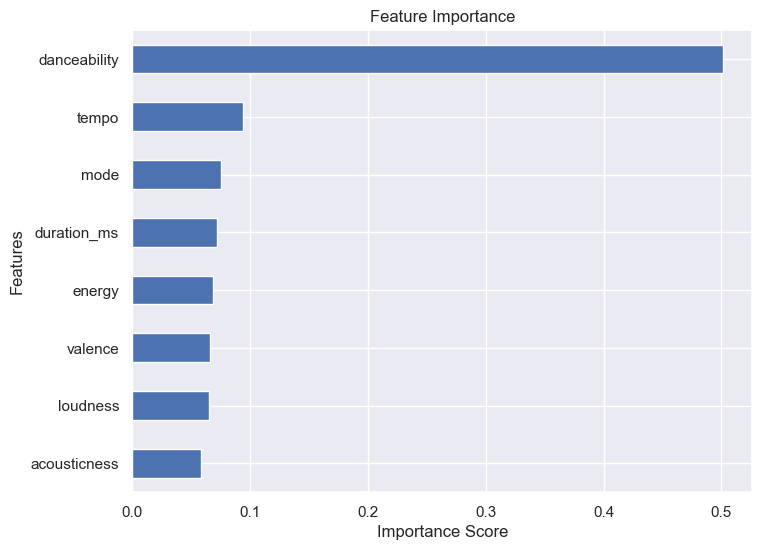

In [189]:
#Group all playlist_genre dummies into one bin when calcualting feature improtance, then test feature importance across all variables.
importances = randf.feature_importances_

allowed_prefixes = ["playlist_genre"]

feat_names_grouped = []
importances_filtered = []

for imp, c in zip(importances, predictors5):
    if any(c.startswith(prefix) for prefix in allowed_prefixes):
        feat_names_grouped.append("playlist_genre")
        importances_filtered.append(imp)
    elif c in num_cols + binary_col: 
        feat_names_grouped.append(c)
        importances_filtered.append(imp)
        
feat_imp = pd.Series(importances_filtered, feat_names_grouped).groupby(level=0).sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [67]:
#Check types of all variables for data_usable
data_usable = data_final.copy()
data_usable.dtypes

track_popularity              int64
danceability                float64
playlist_name                object
track_artist                 object
duration_ms                 float64
energy                      float64
playlist_genre               object
playlist_subgenre            object
track_name                   object
mode                        float64
type                         object
track_album_release_date     object
valence                     float64
key                          object
tempo                       float64
loudness                    float64
acousticness                float64
track_album_name             object
speechiness_log             float64
liveness_log                float64
instrumentalness_binary       int64
dtype: object

In [68]:
#Remove text variables
data_usable = data_usable.select_dtypes(exclude='object')
data_usable.head()

,track_popularity,danceability,duration_ms,energy,mode,valence,tempo,loudness,acousticness,speechiness_log,liveness_log,instrumentalness_binary
0,23,0.636,138053.0,0.746,1.0,0.432,132.310,-3.785,0.0648,-1.405607,-0.761954,1
1,53,0.572,241600.0,0.835,1.0,0.795,129.981,-6.219,0.1710,-1.498941,-1.153663,0
2,55,0.591,329413.0,0.804,1.0,0.658,111.457,-7.299,0.3270,-1.342944,-1.087247,0
3,64,0.443,185160.0,0.104,1.0,0.394,76.474,-17.042,0.9130,-0.995679,-0.718967,0
4,62,0.685,205720.0,0.472,0.0,0.475,80.487,-9.691,0.7850,-1.525784,-0.649752,1


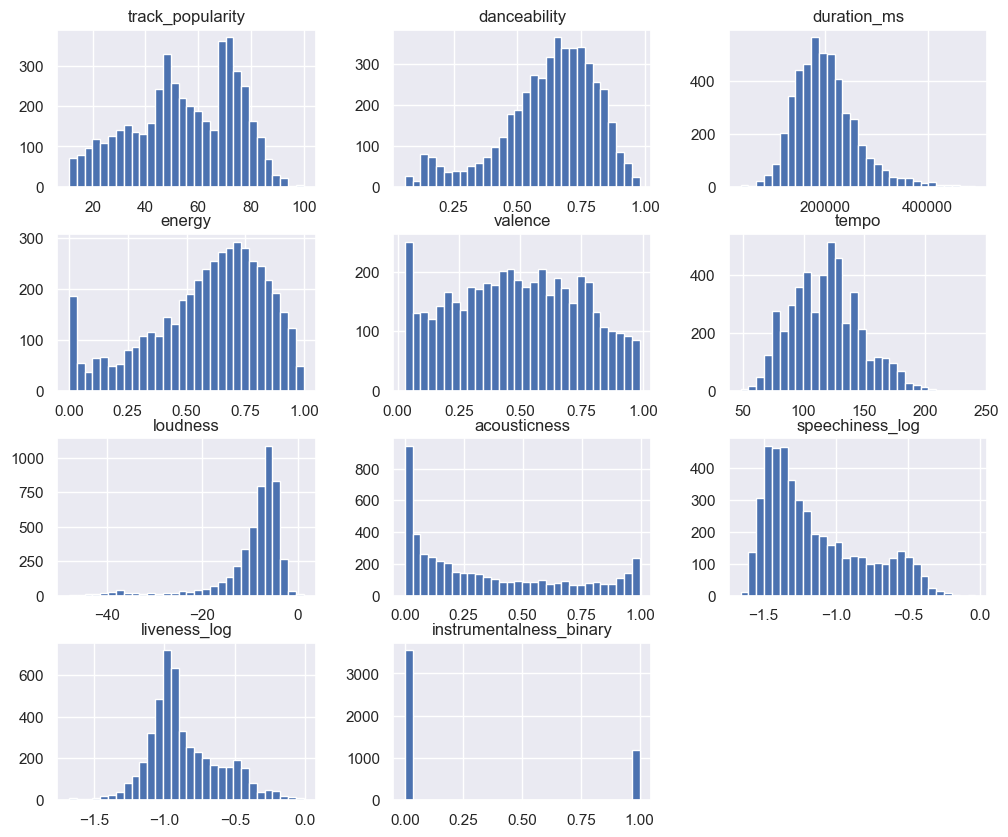

In [69]:
#Show distirbutiosn for all usable variables
numeric_columns = data_usable.select_dtypes(include=['number']).columns
final_columns = data_usable.drop('mode',axis=1).columns
data_usable[final_columns].hist(bins=30, figsize=(12,10))
plt.show()

In [70]:
#Split ranges for each category into low, medium, and high based off spread
data_cat = data_usable.copy()

data_cat['danceability'] = pd.qcut(data_cat['danceability'], q=3, labels=['low','medium','high'])
data_cat['duration_ms'] = pd.qcut(data_cat['duration_ms'], q=3, labels=['low','medium','high'])
data_cat['energy'] = pd.qcut(data_cat['energy'], q=3, labels=['low','medium','high'])
data_cat['valence'] = pd.qcut(data_cat['valence'], q=3, labels=['low','medium','high'])
data_cat['tempo'] = pd.qcut(data_cat['tempo'], q=3, labels=['low','medium','high'])
data_cat['loudness'] = pd.qcut(data_cat['loudness'], q=3, labels=['low','medium','high'])
data_cat['acousticness'] = pd.qcut(data_cat['acousticness'], q=3, labels=['low','medium','high'])
data_cat['speechiness_log'] = pd.qcut(data_cat['speechiness_log'], q=3, labels=['low','medium','high'])
data_cat['liveness_log'] = pd.qcut(data_cat['liveness_log'], q=3, labels=['low','medium','high'])

In [209]:
#Cateogoritze columns, get dummies for new categorical columns (low, medium, and high) and define x and y
cat_cols = ['danceability','duration_ms','energy','valence','tempo','loudness','acousticness','speechiness_log','liveness_log']
bin_col = ['instrumentalness_binary']
target_col = 'track_popularity'

encoded = pd.get_dummies(data_cat[cat_cols], drop_first=True)

x = pd.concat([encoded, data_cat[bin_col]], axis=1)

y = data_cat['track_popularity']

print(x.head())

   danceability_medium  danceability_high  duration_ms_medium  \
0                 True              False               False   
1                False              False               False   
2                 True              False               False   
3                False              False                True   
4                 True              False                True   

   duration_ms_high  energy_medium  energy_high  valence_medium  valence_high  \
0             False          False         True            True         False   
1              True          False         True           False          True   
2              True          False         True           False          True   
3             False          False        False            True         False   
4             False          False        False            True         False   

   tempo_medium  tempo_high  loudness_medium  loudness_high  \
0         False        True            False           True

In [211]:
#Split into test and train sets
x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"\nSize of x_train_cat:\n\n{x_train_cat.shape}")
print(f"\nSize of x_test_cat:\n\n{x_test_cat.shape}")
print(f"\nSize of y_train_cat:\n\n{y_train_cat.shape}")
print(f"\nSize of y_test_cat:\n\n{y_test_cat.shape}")


Size of x_train_cat:

(3790, 19)

Size of x_test_cat:

(948, 19)

Size of y_train_cat:

(3790,)

Size of y_test_cat:

(948,)


In [213]:
#Create linear regression on train data and compute statistics on test data
lr = LinearRegression()
lr.fit(x_train_cat, y_train_cat)

y_pred_cat = lr.predict(x_test_cat)

error = mean_absolute_error(y_test_cat, y_pred_cat)
rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred_cat))
r2_lr = r2_score(y_test_cat, y_pred_cat)

print(f"Mean Absolute Error: {error:.3f}")
print(f"\nRMSE: {rmse:.3f}")
print(f"\nR^2: {r2:.3f}")

Mean Absolute Error: 15.091

RMSE: 18.455

R^2: 0.102


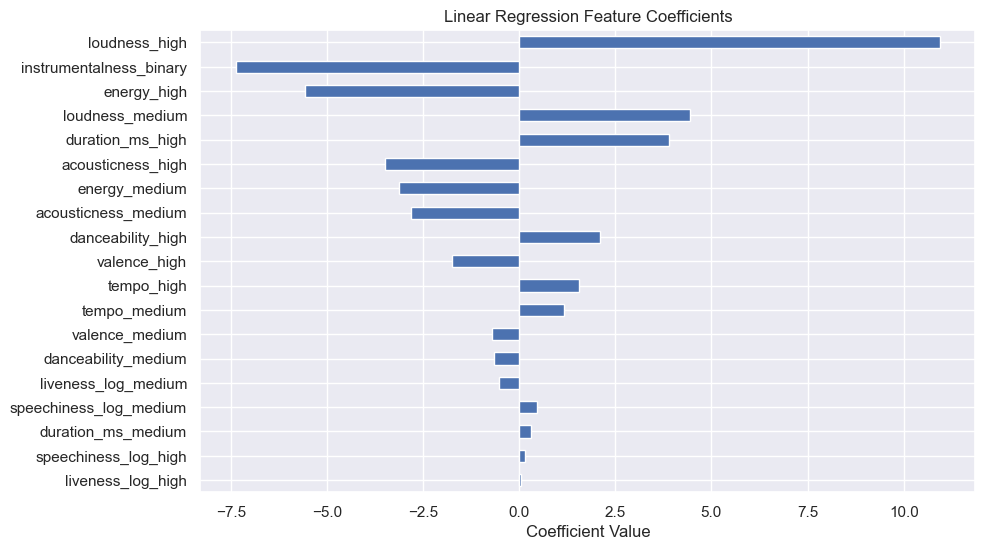

In [219]:
#Calculate coefficients for each feature in the linear regression to see importance and direction
lr = LinearRegression()
lr.fit(x_train_cat, y_train_cat)

coeffs = pd.Series(lr.coef_, index=x_train_cat.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
coeffs.plot(kind='barh')
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Feature Coefficients")
plt.gca().invert_yaxis()
plt.show()

In [223]:
#Create a linear regression with features with a coefficient value that has an absolute value of at least 2.5 and calculate statistics
top_cats = ['loudness_high', 'instrumentalness_binary', 'energy_high', 'loudness_medium', 'duration_ms_high', 'acousticness_high', 'energy_medium', 'acousticness_medium']

x_train_top = x_train_cat[top_cats]
x_test_top = x_test_cat[top_cats]

lr = LinearRegression()
lr.fit(x_train_top, y_train_cat)

y_pred_top = lr.predict(x_test_top)

error = mean_absolute_error(y_test_cat, y_pred_top)
rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred_top))
r2_lr = r2_score(y_test_cat, y_pred_top)

print(f"Mean Absolute Error: {error:.3f}")
print(f"\nRMSE: {rmse:.3f}")
print(f"\nR^2: {r2:.3f}")

Mean Absolute Error: 15.073

RMSE: 18.451

R^2: 0.102


In [225]:
#Add next variable and calculate statistics
top_cats1 = ['loudness_high', 'instrumentalness_binary', 'energy_high', 'loudness_medium', 'duration_ms_high', 'acousticness_high', 'energy_medium', 'acousticness_medium','danceability_high']

x_train_top = x_train_cat[top_cats1]
x_test_top = x_test_cat[top_cats1]

lr = LinearRegression()
lr.fit(x_train_top, y_train_cat)

y_pred_top = lr.predict(x_test_top)

error = mean_absolute_error(y_test_cat, y_pred_top)
rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred_top))
r2_lr = r2_score(y_test_cat, y_pred_top)

print(f"Mean Absolute Error: {error:.3f}")
print(f"\nRMSE: {rmse:.3f}")
print(f"\nR^2: {r2:.3f}")

Mean Absolute Error: 15.111

RMSE: 18.492

R^2: 0.102


In [227]:
#Remove a feature from original list and calculate statistics.
top_cats2 = ['loudness_high', 'instrumentalness_binary', 'energy_high', 'loudness_medium', 'duration_ms_high', 'acousticness_high', 'energy_medium']

x_train_top = x_train_cat[top_cats2]
x_test_top = x_test_cat[top_cats2]

lr = LinearRegression()
lr.fit(x_train_top, y_train_cat)

y_pred_top = lr.predict(x_test_top)

error = mean_absolute_error(y_test_cat, y_pred_top)
rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred_top))
r2_lr = r2_score(y_test_cat, y_pred_top)

print(f"Mean Absolute Error: {error:.3f}")
print(f"\nRMSE: {rmse:.3f}")
print(f"\nR^2: {r2:.3f}")

Mean Absolute Error: 15.111

RMSE: 18.504

R^2: 0.102


In [229]:
#Create a random forest regression with all variables and caluclate statistics.
randf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
randf.fit(x_train_cat, y_train_cat)

y_pred_randf = randf.predict(x_test_cat)

error = mean_absolute_error(y_test_cat, y_pred_randf)
rmse_rf = np.sqrt(mean_squared_error(y_test_cat, y_pred_randf))
r2_rf = r2_score(y_test_cat, y_pred_randf)

n = x_test_cat.shape[0]
p = x_test_cat.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"\nMean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")


Mean Absolute Error: 14.802
Random Forest RMSE: 18.835
Random Forest R^2: 0.086
Random Forest Adjusted R^2: 0.067


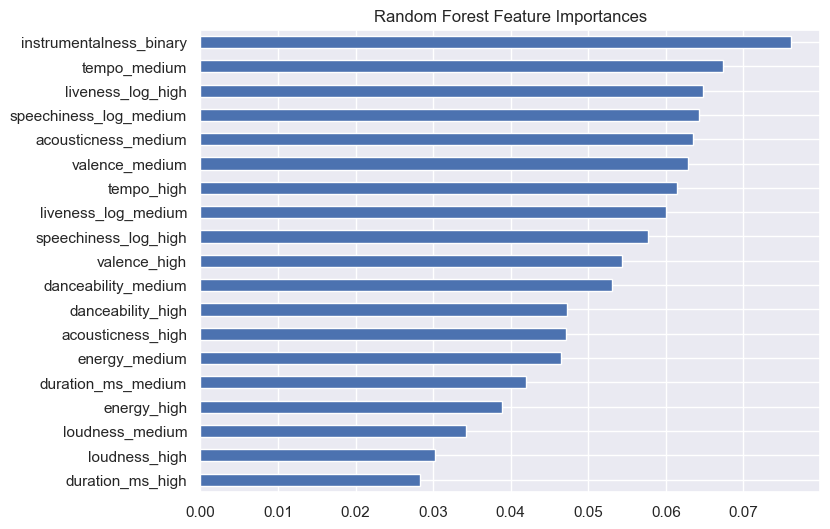

In [230]:
#Display importances of all feature in the random forest model
importances = pd.Series(randf.feature_importances_, index=x_train_cat.columns)
importances_sorted = importances.sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances_sorted.plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.show()

In [233]:
#Create and test a random forest with top 6 variables for feature importance
top_rf_cats = ['instrumentalness_binary', 'tempo_medium', 'liveness_log_high', 'speechiness_log_high', 'acousticness_medium','valence_medium']

x_train_rf1 = x_train_cat[top_rf_cats]
x_test_rf1 = x_test_cat[top_rf_cats]

randf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
randf.fit(x_train_rf1, y_train_cat)

y_pred_randf1 = randf.predict(x_test_rf1)

error = mean_absolute_error(y_test_cat, y_pred_randf1)
rmse_rf = np.sqrt(mean_squared_error(y_test_cat, y_pred_randf1))
r2_rf = r2_score(y_test_cat, y_pred_randf1)

n = x_test_rf1.shape[0]  
p = x_test_rf1.shape[1]   
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"\nMean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")


Mean Absolute Error: 15.717
Random Forest RMSE: 19.078
Random Forest R^2: 0.062
Random Forest Adjusted R^2: 0.056


In [235]:
#Add another variable based off feature importances and calculate statistics
top_rf_cats1 = ['instrumentalness_binary', 'tempo_medium', 'liveness_log_high', 'speechiness_log_high', 'acousticness_medium','valence_medium','tempo_high']

x_train_rf2 = x_train_cat[top_rf_cats1]
x_test_rf2 = x_test_cat[top_rf_cats1]

randf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
randf.fit(x_train_rf2, y_train_cat)

y_pred_randf2 = randf.predict(x_test_rf2)

error = mean_absolute_error(y_test_cat, y_pred_randf2)
rmse_rf = np.sqrt(mean_squared_error(y_test_cat, y_pred_randf2))
r2_rf = r2_score(y_test_cat, y_pred_randf2)

n = x_test_rf2.shape[0]  
p = x_test_rf2.shape[1]   
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"\nMean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")


Mean Absolute Error: 15.714
Random Forest RMSE: 19.050
Random Forest R^2: 0.065
Random Forest Adjusted R^2: 0.058


In [82]:
#Due to increased adjusted R^2 and mean absolute error, keep variables and add another. Calculate statistics
top_rf_cats2 = ['instrumentalness_binary', 'tempo_medium', 'liveness_log_high', 'speechiness_log_high', 'acousticness_medium','valence_medium','tempo_high','liveness_log_medium']

x_train_rf3 = x_train_cat[top_rf_cats2]
x_test_rf3 = x_test_cat[top_rf_cats2]

randf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
randf.fit(x_train_rf3, y_train_cat)

y_pred_randf3 = randf.predict(x_test_rf3)

error = mean_absolute_error(y_test_cat, y_pred_randf3)
rmse_rf = np.sqrt(mean_squared_error(y_test_cat, y_pred_randf3))
r2_rf = r2_score(y_test_cat, y_pred_randf3)

n = x_test_rf3.shape[0]  
p = x_test_rf3.shape[1]   
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"\nMean Absolute Error: {error:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")
print(f"Random Forest Adjusted R^2: {adj_r2_rf:.3f}")


Mean Absolute Error: 15.735
Random Forest RMSE: 19.074
Random Forest R^2: 0.063
Random Forest Adjusted R^2: 0.055


In [83]:
#Because of least optimal statistics, the best model is the one using the top 7 statistics. A function is
#built that estimates the popularity of a song based off whether certain top features are/are not medium
#or high.
def predict_song_popularity(lr_model):
    import pandas as pd

    questions = {
        'loudness_high': "Is loudness high? (1 for yes, 0 for no): ",
        'loudness_medium': "Is loudness medium? (1 for yes, 0 for no): ",
        'energy_high': "Is energy high? (1 for yes, 0 for no): ",
        'energy_medium': "Is energy medium? (1 for yes, 0 for no): ",
        'duration_ms_high': "Is duration high? (1 for yes, 0 for no): ",
        'acousticness_high': "Is acousticness high? (1 for yes, 0 for no): ",
        'acousticness_medium': "Is acousticness medium? (1 for yes, 0 for no): ",
        'instrumentalness_binary': "Is the song instrumental? (1 for yes, 0 for no): "
        }

    user_input = {}
    for feature, question in questions.items():
        while True:
            val = input(question)
            if val in ['0', '1']:
                user_input[feature] = int(val)
                break
            else:
                print("Invalid input. Enter 1 for yes or 0 for no.")

    input_df = pd.DataFrame(columns=lr_model.feature_names_in_)
    for col in lr_model.feature_names_in_:
        input_df.at[0, col] = user_input.get(col, 0) 

    prediction = lr_model.predict(input_df)
    print(f"\nPredicted Song Popularity: {prediction[0]:.2f}")

In [84]:
#Explain to user how to use the function
print("Enter \"predict_song_popularity(lr)\" to esimate the popularity of a song from a scale of 1-100!")

Enter "predict_song_popularity(lr)" to esimate the popularity of a song from a scale of 1-100!


In [85]:
#Import top features in the function to be used in clustering.
features = ["loudness", "energy", "duration_ms", "acousticness", "instrumentalness_binary"]
x = data_final[features]

In [86]:
#Scale numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

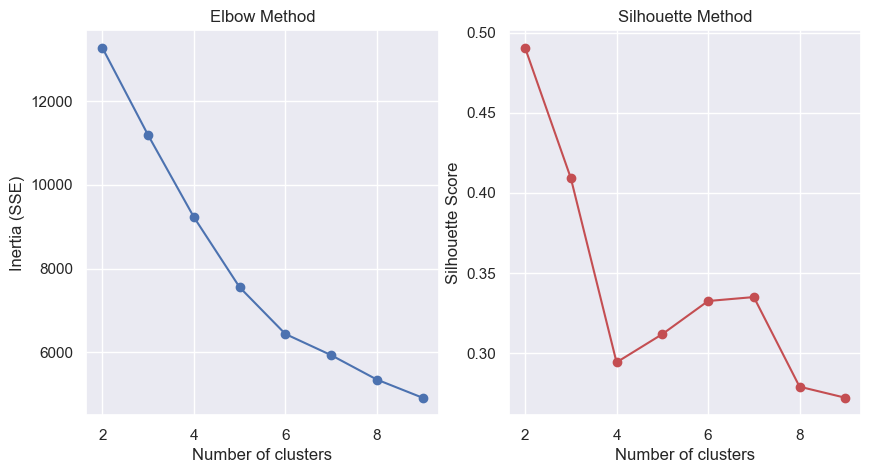

In [243]:
#Estimate a useful value of K based off the elbow and silhouette methods
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(x_scaled, labels))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [88]:
#Use a value of k=6 based off the decrease in negative slope following six in the elbow method and the higher value
#in the silhouette method
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
data_final['cluster'] = kmeans.fit_predict(x_scaled)

In [89]:
#Show average values for each feature in each cluster
cluster_summary = data_final.groupby('cluster')[features].mean()
print(cluster_summary)

          loudness    energy    duration_ms  acousticness  \
cluster                                                     
0        -5.815395  0.729760  185432.551658      0.142016   
1       -33.673774  0.032190  188229.840467      0.952545   
2       -14.398885  0.288637  153459.269517      0.769165   
3        -7.020029  0.690720  294760.784615      0.150903   
4        -9.348584  0.457738  198249.082383      0.622500   
5        -8.504933  0.668690  191967.793296      0.174828   

         instrumentalness_binary  
cluster                           
0                       0.000000  
1                       0.980545  
2                       0.994424  
3                       0.055944  
4                       0.000000  
5                       1.000000  


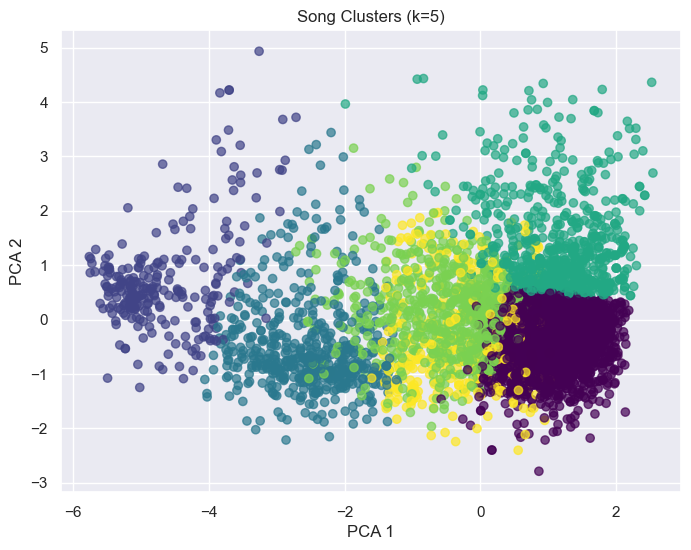

In [90]:
#Graph the 6 clusters of songs based of PCA 1 and 2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], X_pca[:,1], c=data_final['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Song Clusters (k=5)')
plt.show()

In [91]:
#Show what is incorporated in each PCA. PCA 1 shows songs with more loudness and energy in more positive values, and songs
#with more acousticness adn instrumentalness are in more negative values. PCA 2 shows songs with more duration in positive
#values and songs with less duration in more negative values.
import pandas as pd

pca_components = pd.DataFrame(pca.components_, columns=features, index=['PCA1','PCA2'])
print(pca_components)

      loudness    energy  duration_ms  acousticness  instrumentalness_binary
PCA1  0.515676  0.527250     0.171929     -0.491458                -0.430110
PCA2 -0.178474 -0.113232     0.975784      0.051853                -0.021982


In [92]:
#Split popularity into thirds based off number of songs in each range, named "Low", "Medium", and "High"
data_final['popularity_bin'] = pd.qcut(data_final['track_popularity'], q=3, labels=['Low','Medium','High'])

In [93]:
#See average portions of "Low", "Medium", and "High" popularity songs in each cluster to see if certain clusters
#dominate in one range of popularity.
cluster_counts = data_final.groupby('cluster')['popularity_bin'].value_counts(normalize=True)
cluster_percent = cluster_counts.mul(100).round(1)
cluster_percent = cluster_percent.reset_index()
cluster_percent.rename(columns={'popularity_bin':'Popularity', 0:'Percent'}, inplace=True)
print(cluster_percent)

    cluster Popularity  proportion
0         0       High        40.8
1         0        Low        30.5
2         0     Medium        28.7
3         1        Low        51.8
4         1     Medium        45.5
5         1       High         2.7
6         2        Low        51.1
7         2     Medium        45.0
8         2       High         3.9
9         3       High        50.3
10        3     Medium        26.7
11        3        Low        22.9
12        4        Low        36.1
13        4       High        33.1
14        4     Medium        30.8
15        5        Low        52.2
16        5     Medium        31.8
17        5       High        15.9


In [94]:
#Turn the series into a dataframe, rename the "0" column as "Percent" and rename the "popularity_bin" column as 
#"Popularity." Print dataframe
cluster_percent = cluster_counts.reset_index()
cluster_percent.rename(columns={0:'Percent', 'popularity_bin':'Popularity'}, inplace=True)
print(cluster_percent.head())

   cluster Popularity  proportion
0        0       High    0.408457
1        0        Low    0.304661
2        0     Medium    0.286881
3        1        Low    0.517510
4        1     Medium    0.455253


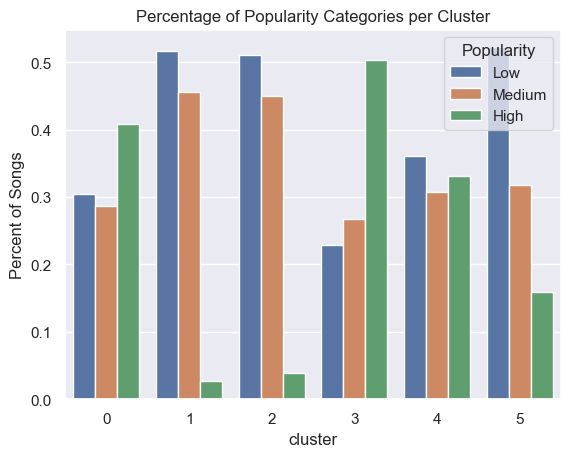

In [95]:
#Display the percent of low, medium, and high popularity songs in each cluster. Clusters 0 and 3 have the greatest
#proportion of high popularity songs, while 1, 2, and 5 have the greatest proportion of low popularity songs, and
#1 and 2 have nearly no high popularity songs. 4 seems to be rougly split between the three categories. This means
#that songs in clusters 0 and 3 product the most popular songs, and clusters 1, 2, and 5 should be avoided in song
#creation.
cluster_percent.rename(columns={'proportion':'Percent'}, inplace=True)
sns.barplot(x='cluster', y='Percent', hue='Popularity', data=cluster_percent)
plt.title('Percentage of Popularity Categories per Cluster')
plt.ylabel('Percent of Songs')
plt.show()

In [96]:
#This shows the average values of the features in each category. Because clusters 0 and 3 should be targeted,
#that means that a high energy, low acousticness, and low instrumentalness should be especially targeted,
#because these are the types of songs that seem to succeed at the highest rate. Conversely, based off
#clusters 1, 2, and 5, songs with a lower loudness, lower energy, medium duration, and high instrumentalness
#are less likely to be popular.
cluster_summary = data_final.groupby('cluster')[features].mean().round(2)
print(cluster_summary)

         loudness  energy  duration_ms  acousticness  instrumentalness_binary
cluster                                                                      
0           -5.82    0.73    185432.55          0.14                     0.00
1          -33.67    0.03    188229.84          0.95                     0.98
2          -14.40    0.29    153459.27          0.77                     0.99
3           -7.02    0.69    294760.78          0.15                     0.06
4           -9.35    0.46    198249.08          0.62                     0.00
5           -8.50    0.67    191967.79          0.17                     1.00
